# Formula 1

## Table of Contents
1. [Import Libraries](#import-libraries)
2. [Load Data from Ergast API](#load-data)
3. [Data Processing](#data-processing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Example JSON Output](#example-json-output)

### 1. Import Libraries <a class="anchor" id="import-libraries"></a>

In [3]:
from datetime import datetime
import time
from IPython.display import clear_output
import requests
import json
import pandas as pd
import math

import matplotlib.pyplot as plt

### 2. Load Data from Ergast API <a class="anchor" id="load-data"></a>

In [4]:
def load_data(url, test = False):
    '''
    Load data from Ergast API. Iterate through API calls with a defined limit of 30 results per call.
    Append responses from separate calls to list.
    
    Input arguments:
    url - (string) Url to API endpoint.
    test - (boolean) If true, only 1 API call is initiated. For testing purposes.
    
    Output:
    responses - (list) List of responses of all API calls. List elements are dictionaries.
    
    '''
    # define url

    # initialize list of dataframes
    responses = []

    # set initial call counter and offset, limit and total number of results
    counter = 0
    offset = 0
    limit = 30
    
    # do a test call, if test == True
    if test == True:
        total = 30
    else:
        total = int(json.loads(requests.get(url).text)['MRData']['total'])

    while offset < total:
        # call API
        r = requests.get(url + '?limit={}&offset={}'.format(limit, offset))

        # append dataframes to list
        responses.append(r.json())

        # increment call counter and offset
        counter += 1
        offset += limit
        # feedback
        if test == True:
            print('Test load, 1 call.')
        else:
            print('Call {} from {}, sleep now.'.format(counter, math.ceil(total/limit)))
            time.sleep(0.5)
            print('Continue...')
            clear_output(wait = True)

    print('Data successfully loaded from url {}.'.format(url))
    
    return responses

In [6]:
seasons_data_list = load_data(url='http://ergast.com/api/f1/seasons.json')

Data successfully loaded from url http://ergast.com/api/f1/seasons.json.


In [220]:
circuits_data_list = load_data(url='http://ergast.com/api/f1/circuits.json')

Data successfully loaded from url http://ergast.com/api/f1/circuits.json.


In [5]:
races_data_list = load_data(url='http://ergast.com/api/f1/races.json')

Data successfully loaded from url http://ergast.com/api/f1/races.json.


In [247]:
results_data_list = load_data(url='http://ergast.com/api/f1/results.json', test=True)

Test load, 1 call.
Data successfully loaded from url http://ergast.com/api/f1/results.json.


In [230]:
qualifying_data_list = load_data(url='http://ergast.com/api/f1/qualifying.json', test=True)

Test load, 1 call.
Data successfully loaded from url http://ergast.com/api/f1/qualifying.json.


In [224]:
status_data_list = load_data(url='http://ergast.com/api/f1/status.json')

Data successfully loaded from url http://ergast.com/api/f1/status.json.


### 3. Data Processing <a class="anchor" id="data-processing"></a>

In [6]:
def process_data(data_list, table, details):
    '''
    Process data list of dictionaries to store them in a pandas dataframe.
    
    Input arguments:
    data_list - (list) List elements are dictionaries.
    table - (string) Table of interest in dictionary above.
    details - (string) Details of interest in table above.
    
    Output:
    df - (dataframe) Merged dataframe of all dictionaries based on relevant table and details.
    '''
    frames = [pd.DataFrame(pd.json_normalize(data_list[r]['MRData'][table][details])) for r in range(0,len(data_list))]
    df = pd.concat(frames).reset_index(drop=True)
    
    print('Processed data list into dataframe based on table "{}" and details "{}".'.format(table, details))
    return df

In [9]:
df_seasons = process_data(seasons_data_list, table = 'SeasonTable', details = 'Seasons')
df_seasons.describe()

Processed data list into dataframe based on table "SeasonTable" and details "Seasons".


,season,url
count,73,73
unique,73,73
top,1950,http://en.wikipedia.org/wiki/1950_Formula_One_...
freq,1,1


In [226]:
df_circuits = process_data(circuits_data_list, table = 'CircuitTable', details = 'Circuits')
df_circuits.describe()

Processed data list into dataframe based on table "CircuitTable" and details "Circuits".


,circuitId,url,circuitName,Location
count,77,77,77,77
unique,77,77,77,76
top,adelaide,http://en.wikipedia.org/wiki/Adelaide_Street_C...,Adelaide Street Circuit,"{'lat': '47.2197', 'long': '14.7647', 'localit..."
freq,1,1,1,2


In [7]:
df_races = process_data(races_data_list, table = 'RaceTable', details = 'Races')
df_races.describe()

Processed data list into dataframe based on table "RaceTable" and details "Races".


,season,round,url,raceName,date,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,...,FirstPractice.date,SecondPractice.date,ThirdPractice.date,Qualifying.date,Sprint.date,FirstPractice.time,SecondPractice.time,ThirdPractice.time,Qualifying.time,Sprint.time
count,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,...,44,44,38,44,6,22,22,19,22,3
unique,73,22,1079,53,1079,76,76,76,76,76,...,44,44,38,44,6,12,12,8,9,2
top,2022,1,http://en.wikipedia.org/wiki/1950_British_Gran...,British Grand Prix,1950-05-13,monza,http://en.wikipedia.org/wiki/Autodromo_Naziona...,Autodromo Nazionale di Monza,45.6156,9.28111,...,2021-03-26,2021-03-26,2021-03-27,2021-03-27,2021-07-17,12:00:00Z,15:00:00Z,11:00:00Z,14:00:00Z,14:30:00Z
freq,22,73,1,73,1,72,72,72,72,72,...,1,1,1,1,1,9,9,9,9,2


In [228]:
df_results = process_data(results_data_list, table = 'RaceTable', details = 'Races')
df_results.describe()

Processed data list into dataframe based on table "RaceTable" and details "Races".


,season,round,url,raceName,Circuit,date,Results
count,2,2,2,2,2,2,2
unique,1,2,2,2,2,2,2
top,1950,1,http://en.wikipedia.org/wiki/1950_British_Gran...,British Grand Prix,"{'circuitId': 'silverstone', 'url': 'http://en...",1950-05-13,"[{'number': '2', 'position': '1', 'positionTex..."
freq,2,1,1,1,1,1,1


In [231]:
df_qualifying = process_data(qualifying_data_list, table = 'RaceTable', details = 'Races')
df_qualifying.describe()

Processed data list into dataframe based on table "RaceTable" and details "Races".


,season,round,url,raceName,Circuit,date,QualifyingResults
count,2,2,2,2,2,2,2
unique,1,2,2,2,2,2,2
top,1994,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,Brazilian Grand Prix,"{'circuitId': 'interlagos', 'url': 'http://en....",1994-03-27,"[{'number': '2', 'position': '1', 'Driver': {'..."
freq,2,1,1,1,1,1,1


In [233]:
df_status = process_data(status_data_list, table = 'StatusTable', details = 'Status')
df_status.describe()

Processed data list into dataframe based on table "StatusTable" and details "Status".


,statusId,count,status
count,135,135,135
unique,135,71,135
top,1,1,Finished
freq,1,26,1


### 4. Exploratory Data Analysis <a class="anchor" id="exploratory-data-analysis"></a>

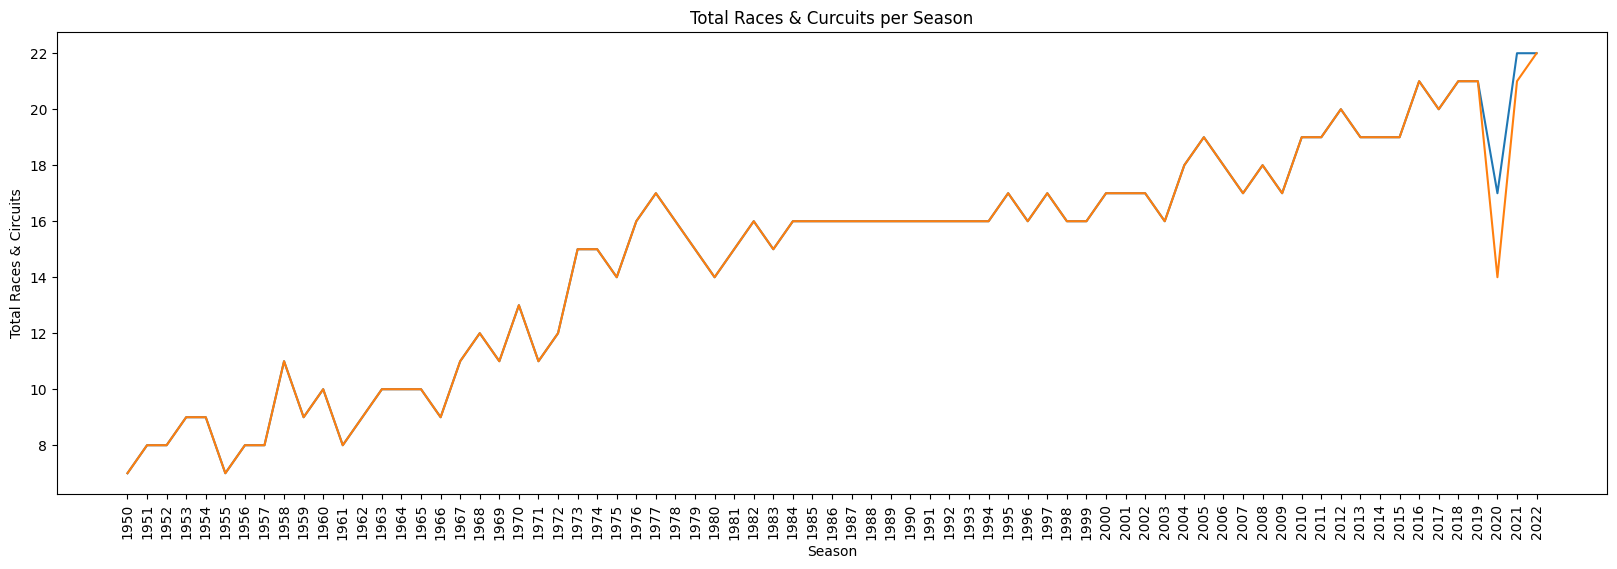

In [11]:
seasons = df_seasons['season'].tolist()
races = df_races.groupby('season')['round'].nunique().tolist()
circuits = df_races.groupby('season')['Circuit.circuitId'].nunique().tolist()

plt.figure(figsize=(20, 6))
plt.title('Total Races & Curcuits per Season')
plt.xlabel('Season')
plt.ylabel('Total Races & Circuits')
plt.xticks(rotation=90)
plt.plot(seasons, races)
plt.plot(seasons, circuits)
plt.show()